# Osteoporosis Project

Model building


# Install PyCaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 4.3 MB/s 
     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.7 MB 35.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 42.5 MB/s 
     |████████████████████████████████| 113 kB 46.9 MB/s 
     |████████████████████████████████| 261 kB 42.2 MB/s 
     |████████████████████████████████| 6.8 MB 40.1 MB/s 
     |████████████████████████████████| 15.5 MB 33.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.2 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 43.4 MB/s 
     |████████████████████████████████| 3.1 MB 15.2 MB/s 
     |████████████████████████████████| 62 kB 947 kB/s 
     |████████████████████████████████| 596 kB 45.8 MB/s 
     |███████████████████

# Imports

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Data

Load the Osteoporosis Data and display the information.

In [ ]:
data_path = 'https://raw.githubusercontent.com/canaleal/SystemPortfolio/main/Clean_Data_Main.csv'
dataset  = pd.read_csv(data_path)


# Data Analysis

Data analysis is a process of inspecting, cleansing, transforming, and modelling data with the goal of discovering useful information, informing conclusions, and supporting decision-making.

In [ ]:
print('Number of rows in the dataset: {}.'.format(dataset.shape[0]))
print('Number of columns in the dataset: {}.'.format(dataset.shape[1]))

Number of rows in the dataset: 819.
Number of columns in the dataset: 30.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientAge         819 non-null    int64  
 1   PatientGender      819 non-null    int64  
 2   bmdtest_height     819 non-null    float64
 3   bmdtest_weight     819 non-null    float64
 4   parentbreak        819 non-null    float64
 5   arthritis          819 non-null    float64
 6   cancer             819 non-null    float64
 7   ptunsteady         819 non-null    int64  
 8   whereliv           819 non-null    float64
 9   education          819 non-null    float64
 10  diabetes           819 non-null    float64
 11  heartdisease       819 non-null    float64
 12  respdisease        819 non-null    float64
 13  alcohol            819 non-null    float64
 14  howbreak           819 non-null    int64  
 15  hip                819 non-null    float64
 16  ankle              819 non

# Cleaning Missing Data

Handling the missing values is one of the greatest challenges faced by analysts, because making the right decision on how to handle it generates robust data models. There are a few ways to fix missing values:

**Deleting Rows**
This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

**Replacing With Mean/Median/Mode** 
We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. 

**We can also predict the missing values or even assign a unique value.**

In [ ]:
missing = pd.DataFrame(dataset.isnull().sum(), columns=['Total'])
missing['%'] = (missing['Total']/dataset.shape[0])*100
missing.sort_values(by='%', ascending=False)

,Total,%
PatientAge,0,0.0
PatientGender,0,0.0
marital,0,0.0
notworking,0,0.0
fxworried,0,0.0
ptfall,0,0.0
wasfractdue2fall,0,0.0
tibfib,0,0.0
shoulder,0,0.0
wrist,0,0.0


In [ ]:
size = dataset.shape[0]
dataset = dataset.dropna()

print('Number of rows in the dataset after the rows with missing values were removed: {}.\n{} rows were removed.'
      .format(dataset.shape[0], size-dataset.shape[0]))

Number of rows in the dataset after the rows with missing values were removed: 819.
0 rows were removed.


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientAge,819.0,71.054945,11.966668,50.00,60.0,71.000000,81.000000,98.00
PatientGender,819.0,1.133089,0.339879,1.00,1.0,1.000000,1.000000,2.00
bmdtest_height,819.0,159.768423,10.901481,1.77,154.0,159.768423,165.000000,220.98
bmdtest_weight,819.0,71.798993,17.579943,37.30,60.0,71.000000,81.414556,212.50
parentbreak,819.0,0.273504,0.691138,0.00,0.0,0.000000,0.000000,4.00
arthritis,819.0,1.000000,0.000000,1.00,1.0,1.000000,1.000000,1.00
cancer,819.0,1.000000,0.000000,1.00,1.0,1.000000,1.000000,1.00
ptunsteady,819.0,0.293040,0.522911,0.00,0.0,0.000000,1.000000,4.00
whereliv,819.0,1.864469,0.699245,1.00,2.0,2.000000,2.000000,7.00
education,819.0,3.384615,1.051164,1.00,3.0,3.000000,4.000000,7.00


# Outliers

When modeling, it is important to clean the data sample to ensure that the observations best represent the problem.

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

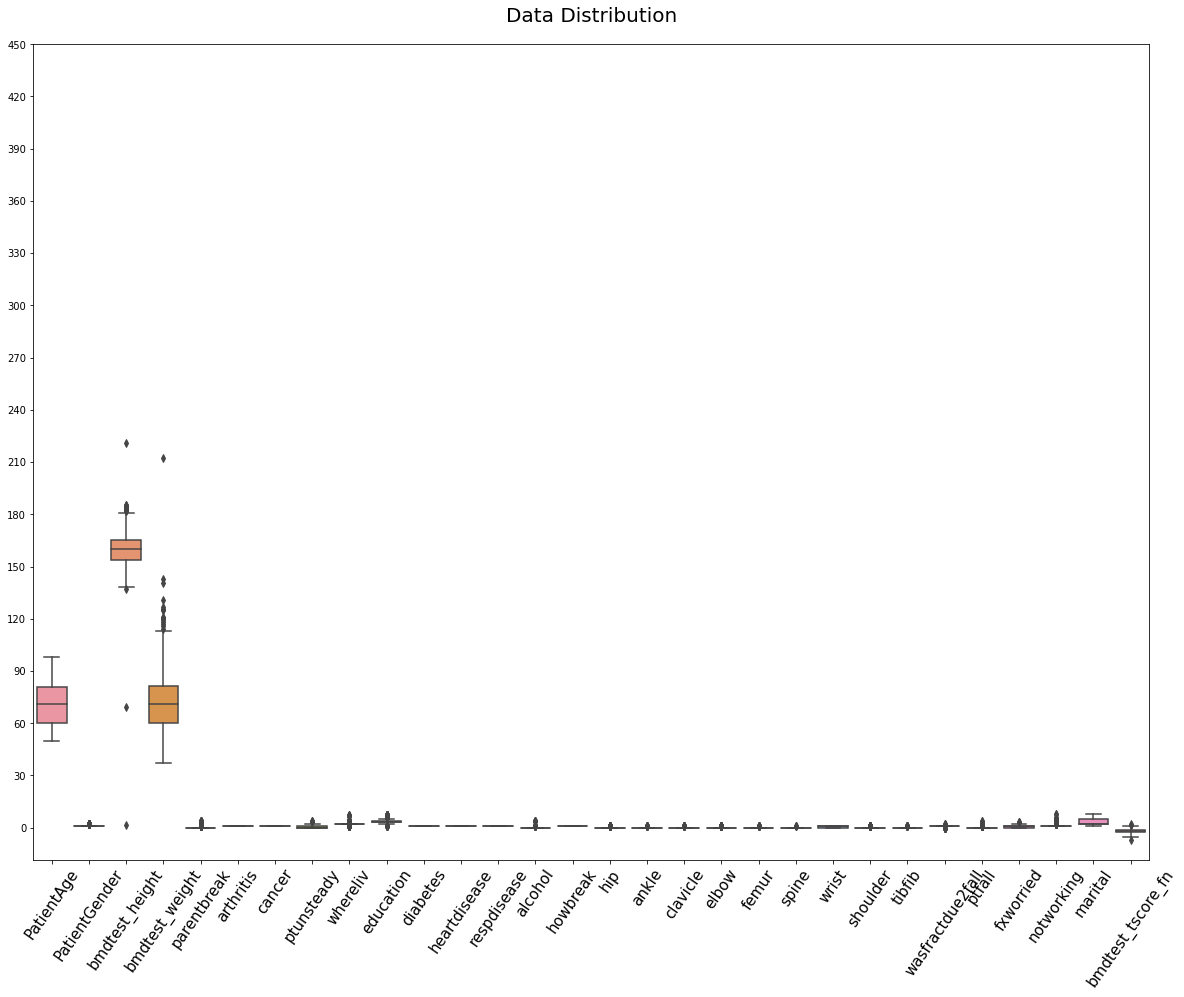

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=dataset)
plt.yticks(range(0,460,30))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution', size=20, y=1.02)
plt.show()

We see that there are some serious outliers in the residual sugar, free sulfur dioxide and total sulfur dioxide columns. Let's remove anything that is above three standard deviations from the mean of the column.

Lets create a function to remove the outliers

In [ ]:
cols = ['bmdtest_height', 'bmdtest_weight']

for c in cols:
    upper_level = dataset[c].mean() + 3*dataset[c].std()
    lower_level = dataset[c].mean() - 3*dataset[c].std()
    dataset = dataset[(dataset[c] > lower_level) & (dataset[c] < upper_level)]

In [ ]:
print('Number of rows in the dataset after the rows with missing values were removed: {}.\n{} rows were removed.'
      .format(dataset.shape[0], size-dataset.shape[0]))

Number of rows in the dataset after the rows with missing values were removed: 809.
10 rows were removed.


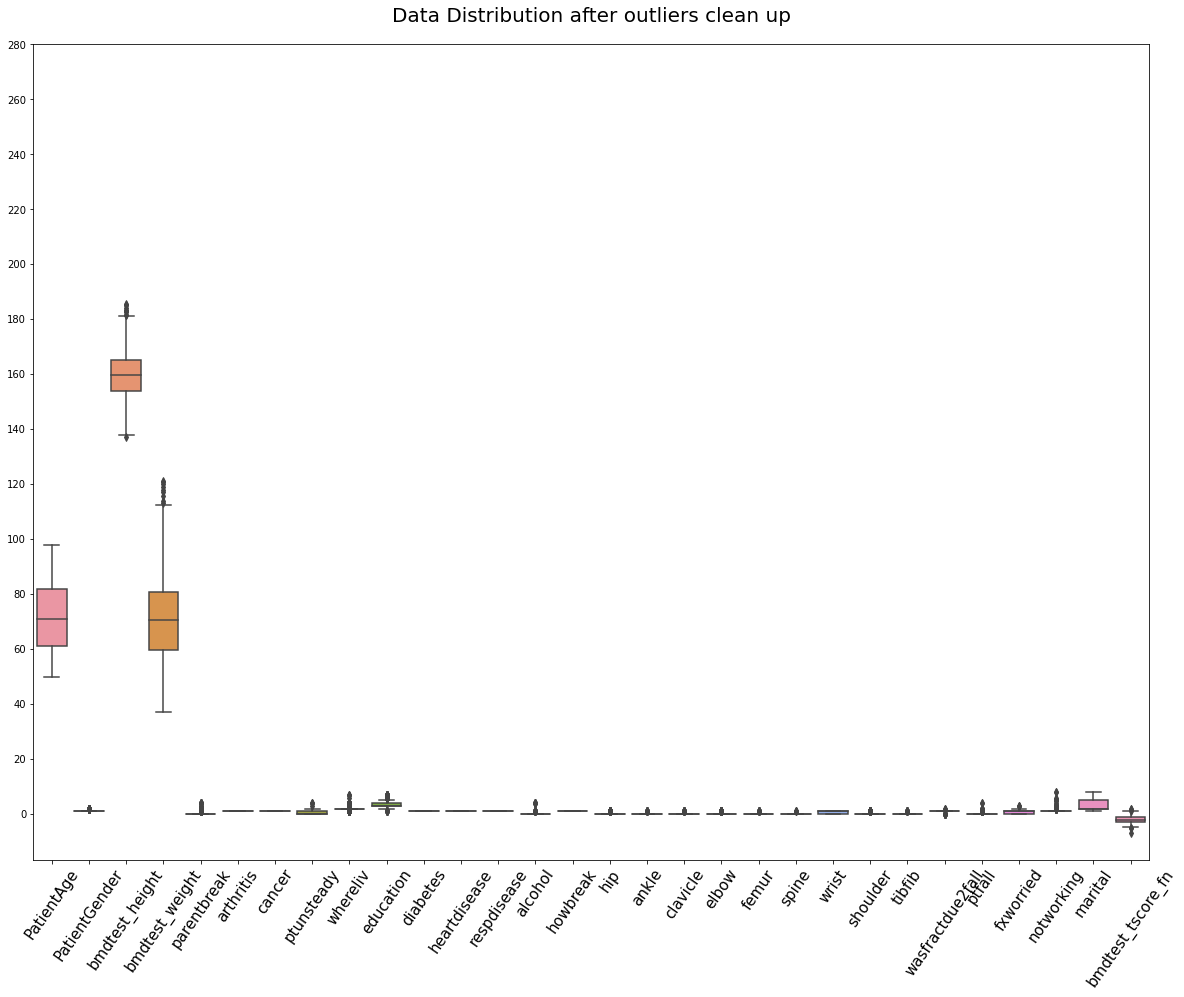

In [ ]:
plt.figure(figsize=(20,15))
sns.boxplot(data=dataset)
plt.yticks(range(0,300,20))
plt.xticks(size=15, rotation=55)
plt.title('Data Distribution after outliers clean up', size=20, y=1.02)
plt.show()

# Data Correlation

In statistics, correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it actually refers to the degree to which a pair of variables are linearly related.

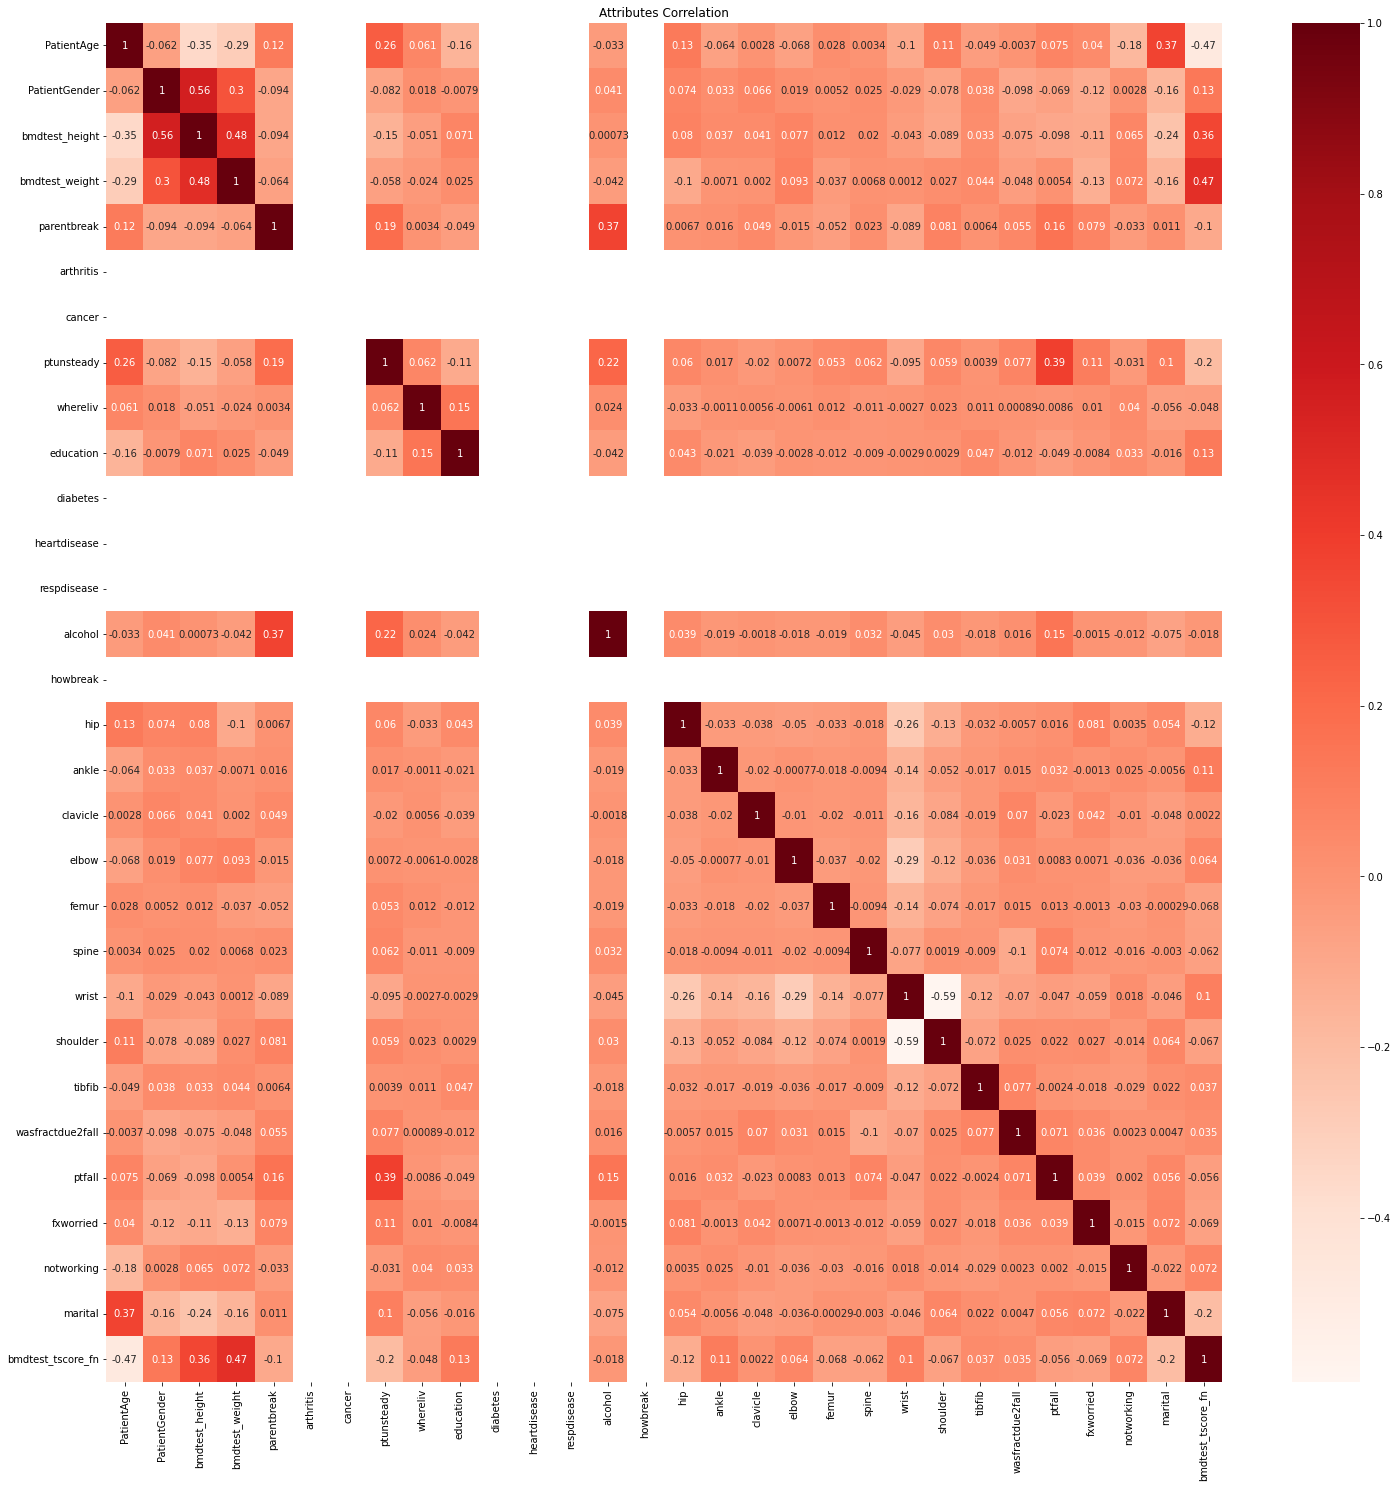

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(dataset.corr(), annot=True, cmap='Reds')
plt.title('Attributes Correlation', y=1.03)
plt.show()

# Select Sample

Before we create a model, lets select a sample dataset. Let's split the data 90% for train set and 10% for the test set.

In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (728, 30)
Unseen Data For Predictions: (81, 30)


# Creating Model (Setup)

Now it's time to create a model which will be trained on the dataset and afterwards will predict the bmd t-score of the data based on its attributes.

The PyCaret library will be used on order to find the best regression model for our dataset.

In [ ]:
from pycaret.regression import *
exp_name = setup(data = dataset,  target = 'bmdtest_tscore_fn', session_id=123)

,Description,Value
0,session_id,123
1,Target,bmdtest_tscore_fn
2,Original Data,"(809, 30)"
3,Missing Values,False
4,Numeric Features,15
5,Categorical Features,14
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(566, 37)"


# Comparing Models


In [ ]:
best_model = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.6729,0.8008,0.8892,0.3341,0.3079,0.8305,0.016
ridge,Ridge Regression,0.6712,0.8010,0.8901,0.3317,0.3078,0.8239,0.016
lr,Linear Regression,0.6721,0.8034,0.8914,0.3298,0.3079,0.8183,0.322
omp,Orthogonal Matching Pursuit,0.6769,0.8046,0.8915,0.3293,0.3092,0.8409,0.016
en,Elastic Net,0.6780,0.8066,0.8927,0.3292,0.3093,0.8529,0.016
lasso,Lasso Regression,0.6851,0.8150,0.8976,0.3223,0.3114,0.8787,0.018
gbr,Gradient Boosting Regressor,0.6899,0.8310,0.9064,0.3038,0.3175,0.7726,0.092
huber,Huber Regressor,0.6834,0.8360,0.9087,0.3036,0.3157,0.8391,0.061
rf,Random Forest Regressor,0.7177,0.8874,0.9362,0.2553,0.3275,0.8068,0.570
et,Extra Trees Regressor,0.7263,0.9156,0.9515,0.2310,0.3260,0.8103,0.507


It looks like the Bayesian Ridge model yeilds best results with the dataset, achieveing an RMSE of 0.8892 and very good MAE, MSE, R2 scores. 